# ***IMPORT LIBRARY***

In [ ]:
import pandas as pd
import math
import numpy as np
import gdown

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

from sklearn.metrics import mean_absolute_error, mean_squared_error

from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# ***DATASET***

## ***Dataset* Film**

In [ ]:
'''https://drive.google.com/file/d/17kQ4-VbHL0Dsn1E9z_OTxgtile3yPIrl/view?usp=sharing'''

id = "17kQ4-VbHL0Dsn1E9z_OTxgtile3yPIrl"
gdown.download(id=id, output="imdb.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=17kQ4-VbHL0Dsn1E9z_OTxgtile3yPIrl
To: /content/imdb.csv
100%|██████████| 1.54M/1.54M [00:00<00:00, 51.9MB/s]


'imdb.csv'

In [ ]:
df_film = pd.read_csv("imdb.csv")
df_film.drop(columns=['Unnamed: 0'], errors='ignore', inplace=True)
df_film

,type,name,url,poster,description,review,IMDB,contentRating,genre,datePublished,keywords,duration,actor,director,creator,RottenTomatoes Audience Score,RottenTomatoes Tomato Meter
0,Movie,14 Cameras,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMTk4OD...,When a family of five rent a beautiful house f...,"{'author': 'aprilsfriendorin', 'dateCreated': ...",2.30,TV-MA,"['Crime', 'Horror', 'Thriller']",2018-07-27,"tied feet,tied up while barefoot,tape over mou...",PT1H30M,"[{'name': 'Zach Dulin', 'url': 'https://www.im...","[{'name': 'Seth Fuller', 'url': 'https://www.i...","[{'name': 'Victor Zarcoff', 'url': 'https://ww...",1.10,1.10
1,Movie,17 Again,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMjA2NT...,0,"{'author': 'tavm', 'dateCreated': '2009-04-21'...",3.20,PG-13,"['Comedy', 'Drama', 'Fantasy']",2009-04-17,"body transformation,adult as child,high school...",PT1H42M,"[{'name': 'Zac Efron', 'url': 'https://www.imd...","[{'name': 'Burr Steers', 'url': 'https://www.i...","[{'name': 'Jason Filardi', 'url': 'https://www...",3.35,2.80
2,Movie,1BR,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BNDgxY2...,0,"{'author': 'aarpcats', 'dateCreated': '2022-01...",2.90,TV-MA,"['Drama', 'Horror', 'Thriller']",2020-04-24,"community,apartment building,submission,stockh...",PT1H30M,"[{'name': 'Nicole Brydon Bloom', 'url': 'https...","[{'name': 'David Marmor', 'url': 'https://www....","[{'name': 'David Marmor', 'url': 'https://www....",2.65,4.40
3,Movie,3 Days to Kill,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BYjE2Nm...,A dying CIA agent trying to reconnect with his...,"{'author': 'slightlymad22', 'dateCreated': '20...",3.10,PG-13,"['Action', 'Comedy', 'Drama']",2014-02-25,"spy,violence,dirty bomb,massacre,cough syrup",PT1H57M,"[{'name': 'Kevin Costner', 'url': 'https://www...","[{'name': 'McG', 'url': 'https://www.imdb.com/...","[{'name': 'Adi Hasak', 'url': 'https://www.imd...",2.15,1.40
4,Movie,3 Idiots,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BNTkyOG...,0,"{'author': 'lanacastillo49', 'dateCreated': '2...",4.20,13+,"['Comedy', 'Drama']",2009-12-25,"hairy chest,motivation,coming of age,against t...",PT2H50M,"[{'name': 'Aamir Khan', 'url': 'https://www.im...","[{'name': 'Rajkumar Hirani', 'url': 'https://w...","[{'name': 'Abhijat Joshi', 'url': 'https://www...",4.65,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,Movie,Zombieland,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMjIzND...,0,"{'author': 'Fella_shibby', 'dateCreated': '201...",3.80,D,"['Action', 'Comedy', 'Horror']",2009-10-02,"zombie,amusement park,human versus zombie,zomb...",PT1H28M,"[{'name': 'Jesse Eisenberg', 'url': 'https://w...","[{'name': 'Ruben Fleischer', 'url': 'https://w...","[{'name': 'Rhett Reese', 'url': 'https://www.i...",4.30,4.45
850,Movie,iNumber Number: Jozi Gold,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BM2RhYz...,When an undercover cop is tasked with investig...,"{'author': 'penofinspiratin', 'dateCreated': '...",2.20,0,"['Action', 'Adventure', 'Crime']",2023-06-23,"police procedural crime,team action",PT1H53M,"[{'name': 'Lonwabo Bokamoso', 'url': 'https://...","[{'name': 'Donovan Marsh', 'url': 'https://www...","[{'name': 'Donovan Marsh', 'url': 'https://www...",0.00,0.00
851,Movie,¡Que viva México!,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMDFiMD...,0,"{'author': 'cobo-3', 'dateCreated': '2023-03-2...",2.75,R,['Comedy'],2023-03-23,"female full frontal nudity,female nudity,femal...",PT3H11M,"[{'name': 'Damián Alcázar', 'url': 'https://ww...","[{'name': 'Luis Estrada', 'url': 'https://www....","[{'name': 'Luis Estrada', 'url': 'https://www....",0.00,1.45
852,Movie,¿Enco

## ***Dataset Rating***


In [ ]:
'''https://drive.google.com/file/d/19R20uhlTJZp56nx5BlRgdH_j3bZpk5MZ/view?usp=sharing'''

id = "19R20uhlTJZp56nx5BlRgdH_j3bZpk5MZ"
gdown.download(id=id, output="roberta_sentiment_scores.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=19R20uhlTJZp56nx5BlRgdH_j3bZpk5MZ
To: /content/roberta_sentiment_scores.csv
100%|██████████| 5.74M/5.74M [00:00<00:00, 21.8MB/s]


'roberta_sentiment_scores.csv'

In [ ]:
df_rating = pd.read_csv("roberta_sentiment_scores.csv")
df_rating

,title,username,Text,Sentiment,sentiment_score
0,Cargo,moviemenfes,this mvs is very sad nangiiis in this scene th...,Positive,4.993645
1,Layar,bicaraboxoffice,if for example there is one film that aired on...,Neutral,1.009726
2,What If,moviemenfes,mvs what if today? how come it s not in disney...,Neutral,1.010560
3,Layar,WatchmenID,for those who miss seeing arini on the big screen,Neutral,1.386715
4,Lightyear,ErikDavis,new trailer chris evans stars as buzz in a new...,Neutral,4.128984
...,...,...,...,...,...
34063,Rise,zavvi,the droids hold a special place in my heart an...,Positive,4.993868
34064,Rise,zavvi,okay campers rise and shine! this sunday at 7p...,Positive,4.984983
34065,Rise,zavvi,star wars episode ix the rise of skywalker zav...,Positive,4.956692
34066,Seasons,zavvi,season 1 6 blu ray boxset only 69 99 in our !,Negative,1.008112


In [ ]:
df_rating.describe()

,sentiment_score
count,34068.000000
mean,3.112461
std,1.967766
min,1.007205
25%,1.009236
50%,4.958761
75%,4.989870
max,4.995188


# ***PRE-PROCESSING DATASET RATING***

## ***Detect Outliers***

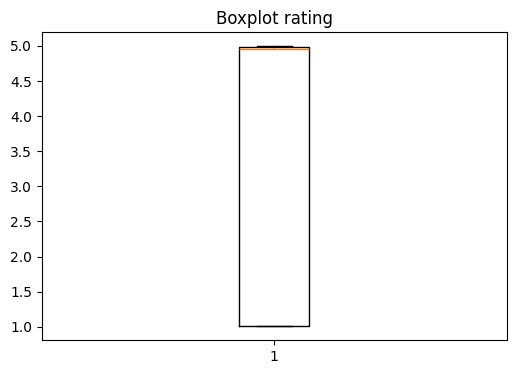

Outlier values:
Series([], Name: sentiment_score, dtype: float64)


In [ ]:
# mengecek outlier menggunakan z-score
plt.figure(figsize=(6, 4))
plt.boxplot(df_rating["sentiment_score"])
plt.title(f'Boxplot {"rating"}')
plt.show()

z_scores = stats.zscore(df_rating["sentiment_score"])
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)
outlier_values = df_rating["sentiment_score"][outliers]

print("Outlier values:")
print(outlier_values)

## ***Set Columns***

In [ ]:
df_rating = df_rating.rename(columns={'username': 'nama_akun'})
df_rating = df_rating.rename(columns={'title': 'judul_film'})
df_rating = df_rating.rename(columns={'sentiment_score': 'rating'})

## ***Missing Value***

In [ ]:
print(df_rating.isnull().sum())

judul_film    0
nama_akun     0
Text          0
Sentiment     0
rating        0
dtype: int64


In [ ]:
df_rating

,judul_film,nama_akun,Text,Sentiment,rating
0,Cargo,moviemenfes,this mvs is very sad nangiiis in this scene th...,Positive,4.993645
1,Layar,bicaraboxoffice,if for example there is one film that aired on...,Neutral,1.009726
2,What If,moviemenfes,mvs what if today? how come it s not in disney...,Neutral,1.010560
3,Layar,WatchmenID,for those who miss seeing arini on the big screen,Neutral,1.386715
4,Lightyear,ErikDavis,new trailer chris evans stars as buzz in a new...,Neutral,4.128984
...,...,...,...,...,...
34063,Rise,zavvi,the droids hold a special place in my heart an...,Positive,4.993868
34064,Rise,zavvi,okay campers rise and shine! this sunday at 7p...,Positive,4.984983
34065,Rise,zavvi,star wars episode ix the rise of skywalker zav...,Positive,4.956692
34066,Seasons,zavvi,season 1 6 blu ray boxset only 69 99 in our !,Negative,1.008112


# ***TEMPLATE DATASET***

## ***Dataset* Kosong**

Berisi kolom yang akan diisi untuk hasil prediksi *rating* sistem rekomendasi.

In [ ]:
columns = []
columns.append('nama film')
accounts = df_rating.nama_akun.unique()
for account_index in range (0, len(accounts)):
  columns.append(accounts[account_index])

data_entries = []
films = df_film.name
for film_index in range (0, len(films)):
  data_entries.append({'nama film' : films[film_index]})

In [ ]:
df = pd.DataFrame(columns=columns)
df = pd.concat([df, pd.DataFrame(data_entries)], ignore_index=True)
df.fillna(0, inplace=True)

## ***Merging Dataset***

Penggabungan kolom pada *dataset* dengan cara mengambil data nama akun dan judul film sebagai kolom, serta *rating* sebagai *value*.

In [ ]:
for rating_index in range(len(df_rating)):
    df[df_rating["nama_akun"][rating_index]].loc[df["nama film"] == df_rating["judul_film"][rating_index]] = round(df_rating["rating"][rating_index],2)

df

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,14 Cameras,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
1,17 Again,1.01,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,1.01,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
2,1BR,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.00,4.99,0.0,0.0,0.0,0.0
3,3 Days to Kill,0.00,0.0,0.00,0.0,1.01,1.01,4.99,0.00,0.0,...,0.00,1.01,0.0,0.0,1.01,0.00,0.0,0.0,0.0,0.0
4,3 Idiots,1.01,0.0,1.01,0.0,0.00,0.00,1.01,4.99,0.0,...,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,Zombieland,1.01,0.0,4.99,0.0,1.01,4.98,4.99,4.99,0.0,...,1.01,4.99,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
850,iNumber Number: Jozi Gold,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
851,¡Que viva México!,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
852,¿Encontró lo que buscaba?,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0


# ***DATASET* SIAP OLAH**

## ***Sparsity Data***

Sparse data merujuk pada situasi di mana sebagian besar nilai dalam suatu dataset adalah nol

In [ ]:
jumlah_nilai_nol = (df.iloc[:, 1:] == 0).sum().sum()
jumlah_total = df.iloc[:, 1:].size
persentase_sparsity = (jumlah_nilai_nol / jumlah_total) * 100

print(f"Jumlah nilai 0 dalam dataset: {jumlah_nilai_nol}")
print(f"Persentase sparsity: {persentase_sparsity:.2f}%")

Jumlah nilai 0 dalam dataset: 29677
Persentase sparsity: 89.10%


In [ ]:
def cek_nilai_nol(row):
    return len([value for value in row if value != 0])

df['Nilai Nol'] = df.apply(cek_nilai_nol, axis=1)
df_film['Nilai Nol'] = df['Nilai Nol']

df = df[df['Nilai Nol'] > 5]
df_film = df_film[df_film['Nilai Nol'] > 5]

df = df.drop('Nilai Nol', axis=1)
df = df.reset_index(drop=True)

df_film = df_film.drop('Nilai Nol', axis=1)
df_film = df_film.reset_index(drop=True)

df

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.00,0.00,0.00,0.00,1.01,1.01,4.99,0.00,0.00,...,0.00,1.01,0.00,0.00,1.01,0.00,0.00,0.00,0.00,0.00
1,3 Idiots,1.01,0.00,1.01,0.00,0.00,0.00,1.01,4.99,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,5 Cowok Jagoan,0.00,1.01,0.00,0.00,0.00,4.99,4.99,1.01,0.00,...,0.00,0.00,0.00,0.00,0.00,4.99,0.00,0.00,0.00,0.00
3,6 Underground,4.99,3.00,0.00,0.00,4.98,4.99,0.00,1.01,0.00,...,0.00,1.01,0.00,0.00,0.00,4.99,0.00,0.00,0.00,0.00
4,65,1.01,1.01,4.99,1.01,1.01,4.99,4.99,1.01,4.98,...,4.99,4.99,4.99,4.97,4.96,1.01,1.01,0.00,1.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,You People,1.01,0.00,0.00,1.01,0.00,0.00,0.00,0.00,4.99,...,0.00,0.00,0.00,1.01,0.00,0.00,1.01,0.00,0.00,1.01
278,Young Adult,0.00,0.00,0.00,0.00,0.00,4.99,4.97,4.99,0.00,...,0.00,4.99,0.00,0.00,4.76,0.00,0.00,0.00,0.00,0.00
279,Your Place or Mine,1.02,0.00,0.00,4.99,0.00,0.00,0.00,0.00,4.99,...,0.00,0.00,0.00,0.00,0.00,1.01,1.01,0.00,0.00,0.00
280,Zodiac,4.99,0.00,1.01,0.00,0.00,1.02,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.01,0.00,0.00


In [ ]:
# cek setelah di drop beberapa film
jumlah_nilai_nol = (df.iloc[:, 1:] == 0).sum().sum()
jumlah_total = df.iloc[:, 1:].size
persentase_sparsity = (jumlah_nilai_nol / jumlah_total) * 100

print(f"Jumlah nilai 0 dalam dataset: {jumlah_nilai_nol}")
print(f"Persentase sparsity: {persentase_sparsity:.2f}%")

Jumlah nilai 0 dalam dataset: 7873
Persentase sparsity: 71.59%


## ***Data Normalization***

Menggunakan ***Min-Max Scaler*** untuk mengubah nilai-nilai dalam suatu fitur (*variabel*) sehingga rentang nilainya antara 0 hingga 1. Guna menghindari bias yang dapat timbul jika beberapa fitur memiliki skala yang jauh berbeda dalam data.

In [ ]:
df_normalized = df.copy()

scaler = MinMaxScaler()
columns = df.columns[1:]
df_normalized[columns] = scaler.fit_transform(df_normalized[columns])

df_normalized

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.000000,0.000000,0.000000,0.000000,0.202405,0.202405,1.000000,0.000000,0.000000,...,0.000000,0.202405,0.0,0.000000,0.202405,0.000000,0.000000,0.000000,0.000000,0.0
1,3 Idiots,0.202405,0.000000,0.202405,0.000000,0.000000,0.000000,0.202405,1.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,5 Cowok Jagoan,0.000000,0.202405,0.000000,0.000000,0.000000,1.000000,1.000000,0.202405,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
3,6 Underground,1.000000,0.601202,0.000000,0.000000,0.997996,1.000000,0.000000,0.202405,0.000000,...,0.000000,0.202405,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
4,65,0.202405,0.202405,1.000000,0.202405,0.202405,1.000000,1.000000,0.202405,0.997996,...,1.000000,1.000000,1.0,0.995992,0.993988,0.202405,0.202405,0.000000,0.202405,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,You People,0.202405,0.000000,0.000000,0.202405,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,0.202405,0.000000,0.000000,0.202405,0.000000,0.000000,1.0
278,Young Adult,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.995992,1.000000,0.000000,...,0.000000,1.000000,0.0,0.000000,0.953908,0.000000,0.000000,0.000000,0.000000,0.0
279,Your Place or Mine,0.204409,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.202405,0.202405,0.000000,0.000000,0.0
280,Zodiac,1.000000,0.000000,0.202405,0.000000,0.000000,0.204409,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.202405,0.000000,0.0


## ***Transposing Dataset***

In [ ]:
df_transposed = df_normalized.set_index('nama film').T
df_transposed

nama film,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
moviemenfes,0.000000,0.202405,0.000000,1.000000,0.202405,1.000000,1.000000,0.202405,1.000000,0.000000,...,0.202405,0.202405,0.202405,0.202405,1.000000,0.202405,0.000000,0.204409,1.000000,0.202405
bicaraboxoffice,0.000000,0.000000,0.202405,0.601202,0.202405,0.000000,0.000000,0.204409,0.000000,0.202405,...,0.202405,0.202405,0.202405,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WatchmenID,0.000000,0.202405,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.204409,0.000000,0.000000,0.000000,0.202405,1.000000
ErikDavis,0.000000,0.000000,0.000000,0.000000,0.202405,0.000000,0.000000,0.202405,0.000000,0.000000,...,0.000000,0.202405,0.000000,0.000000,0.000000,0.202405,0.000000,1.000000,0.000000,0.000000
arulfittron,0.202405,0.000000,0.000000,0.997996,0.202405,0.000000,0.202405,0.000000,0.000000,0.202405,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.202405
GilaFilmID,0.202405,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.202405,0.997996,1.000000,...,0.202405,0.202405,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.204409,0.997996
TarizSolis,1.000000,0.202405,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.202405,1.000000,...,0.997996,0.000000,1.000000,0.000000,0.000000,0.000000,0.995992,0.000000,0.000000,1.000000
djaycoholyc,0.000000,1.000000,0.202405,0.202405,0.202405,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.993988,1.000000,0.000000,0.202405,0.000000,1.000000,0.000000,0.000000,1.000000
akstanwyck,0.000000,0.000000,0.000000,0.000000,0.997996,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.202405,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
slashfilm,0.000000,0.000000,0.000000,0.000000,0.202405,0.000000,0.000000,0.202405,0.000000,0.000000,...,0.997996,0.983968,0.000000,0.000000,0.000000,1.000000,0.000000,0.202405,0.000000,0.000000


In [ ]:
# # dataset siap olah
# df_transposed.to_excel("Dataset_Siap_Olah.xlsx", index=True)

# **DISTRIBUSI DATA**

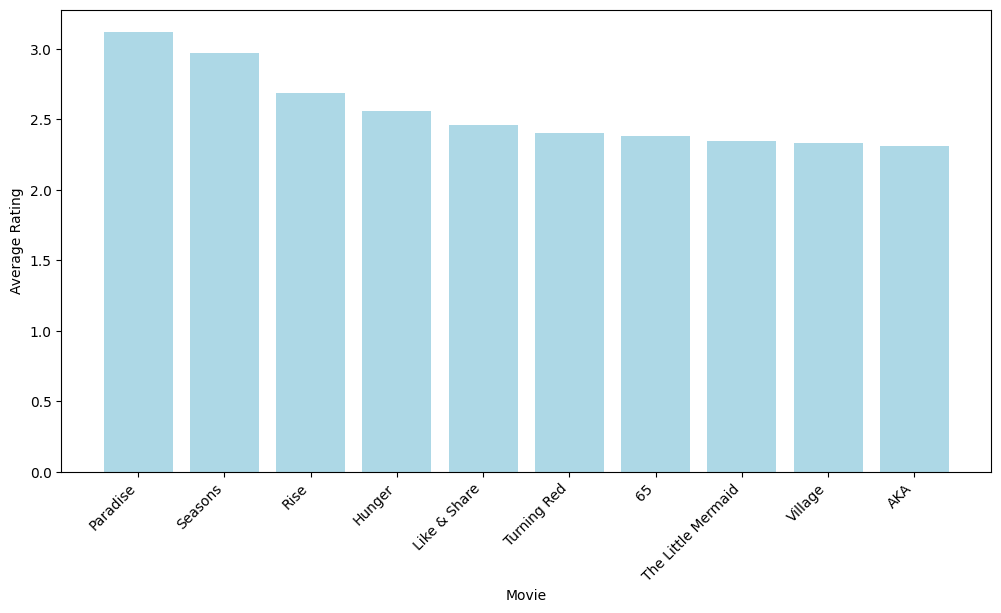

In [ ]:
data = df.copy()
# data = data.replace(0, np.NAN)

data["average"] = data.iloc[:, 1:].mean(axis=1)
data = data.sort_values("average", ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(data["nama film"][:10], data["average"][:10], color='lightblue')
plt.xlabel("Movie")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha="right")
plt.show()

# ***COLLABORATIVE FILTERING***

In [ ]:
df_cf = df_transposed.copy()
df_cf

nama film,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
moviemenfes,0.000000,0.202405,0.000000,1.000000,0.202405,1.000000,1.000000,0.202405,1.000000,0.000000,...,0.202405,0.202405,0.202405,0.202405,1.000000,0.202405,0.000000,0.204409,1.000000,0.202405
bicaraboxoffice,0.000000,0.000000,0.202405,0.601202,0.202405,0.000000,0.000000,0.204409,0.000000,0.202405,...,0.202405,0.202405,0.202405,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WatchmenID,0.000000,0.202405,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.204409,0.000000,0.000000,0.000000,0.202405,1.000000
ErikDavis,0.000000,0.000000,0.000000,0.000000,0.202405,0.000000,0.000000,0.202405,0.000000,0.000000,...,0.000000,0.202405,0.000000,0.000000,0.000000,0.202405,0.000000,1.000000,0.000000,0.000000
arulfittron,0.202405,0.000000,0.000000,0.997996,0.202405,0.000000,0.202405,0.000000,0.000000,0.202405,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.202405
GilaFilmID,0.202405,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.202405,0.997996,1.000000,...,0.202405,0.202405,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.204409,0.997996
TarizSolis,1.000000,0.202405,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.202405,1.000000,...,0.997996,0.000000,1.000000,0.000000,0.000000,0.000000,0.995992,0.000000,0.000000,1.000000
djaycoholyc,0.000000,1.000000,0.202405,0.202405,0.202405,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.993988,1.000000,0.000000,0.202405,0.000000,1.000000,0.000000,0.000000,1.000000
akstanwyck,0.000000,0.000000,0.000000,0.000000,0.997996,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.202405,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
slashfilm,0.000000,0.000000,0.000000,0.000000,0.202405,0.000000,0.000000,0.202405,0.000000,0.000000,...,0.997996,0.983968,0.000000,0.000000,0.000000,1.000000,0.000000,0.202405,0.000000,0.000000


## **Fungsi Mencari Rata-Rata dan Top N**

In [ ]:
# menghitung rata-rata
def average(df, film_name):
    """Calculates the average rating for a given film in a transposed DataFrame."""
    if film_name in df.columns:
        ratings = df[film_name]
        # Filter out non-zero ratings
        valid_ratings = ratings[ratings != 0]
        if not valid_ratings.empty:
            return round(valid_ratings.mean(), 2)
    return 0

In [ ]:
# mencari top n
def top_n(n, df, col):
    top_values = df[col].nlargest(n)
    return top_values

# ***USER-BASED***

In [ ]:
print(df_transposed.columns)

Index(['3 Days to Kill', '3 Idiots', '5 Cowok Jagoan', '6 Underground', '65',
       'A Classic Horror Story', 'A Ghost Story', 'A Man Called Otto',
       'A Perfect Fit', 'A Wrinkle in Time',
       ...
       'Weathering', 'What If', 'Why Do You Love Me', 'Wind River',
       'Wish Dragon', 'You People', 'Young Adult', 'Your Place or Mine',
       'Zodiac', 'Zombieland'],
      dtype='object', name='nama film', length=282)


In [ ]:
user_based_df = df_normalized.copy()
temp = df_transposed
target = df_cf.copy()

for i in range(len(user_based_df)):
    for j in range(len(temp.index)): # Corrected: Iterate over the index of temp
        if (user_based_df[temp.index[j]][i] != 0): # Corrected: Access movie name from the index
            user_based_df[temp.index[j]][i] -= average(target,user_based_df['nama film'][i])
user_based_df

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.000000,0.000000,0.000000,0.000000,-0.397595,-0.397595,0.400000,0.000000,0.000000,...,0.000000,-0.397595,0.00,0.000000,-0.397595,0.000000,0.000000,0.000000,0.000000,0.00
1,3 Idiots,-0.227595,0.000000,-0.227595,0.000000,0.000000,0.000000,-0.227595,0.570000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2,5 Cowok Jagoan,0.000000,-0.527595,0.000000,0.000000,0.000000,0.270000,0.270000,-0.527595,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.270000,0.000000,0.000000,0.000000,0.00
3,6 Underground,0.250000,-0.148798,0.000000,0.000000,0.247996,0.250000,0.000000,-0.547595,0.000000,...,0.000000,-0.547595,0.00,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.00
4,65,-0.357595,-0.357595,0.440000,-0.357595,-0.357595,0.440000,0.440000,-0.357595,0.437996,...,0.440000,0.440000,0.44,0.435992,0.433988,-0.357595,-0.357595,0.000000,-0.357595,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,You People,-0.287595,0.000000,0.000000,-0.287595,0.000000,0.000000,0.000000,0.000000,0.510000,...,0.000000,0.000000,0.00,-0.287595,0.000000,0.000000,-0.287595,0.000000,0.000000,0.51
278,Young Adult,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,0.075992,0.080000,0.000000,...,0.000000,0.080000,0.00,0.000000,0.033908,0.000000,0.000000,0.000000,0.000000,0.00
279,Your Place or Mine,-0.515591,0.000000,0.000000,0.280000,0.000000,0.000000,0.000000,0.000000,0.280000,...,0.000000,0.000000,0.00,0.000000,0.000000,-0.517595,-0.517595,0.000000,0.000000,0.00
280,Zodiac,0.400000,0.000000,-0.397595,0.000000,0.000000,-0.395591,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,-0.397595,0.000000,0.00


## ***Cosine Similarity***

In [ ]:
# Mengambil kolom dengan nilai-nilai rating
rating_matrix2 = user_based_df.iloc[:, 1:]
sim_user = cosine_similarity(rating_matrix2.T)

sim_user_cs = pd.DataFrame(sim_user, index=user_based_df.iloc[:, 1:].columns, columns=user_based_df.iloc[:, 1:].columns)
sim_user_cs

,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,slashfilm,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
moviemenfes,1.000000,0.018219,-0.186736,0.022712,-0.001580,-0.009201,-0.075352,-0.113854,-0.110084,-0.014372,...,-0.031498,-0.089097,0.006830,-0.120353,-0.120172,0.049107,0.075356,-0.041788,-0.052153,-0.003014
bicaraboxoffice,0.018219,1.000000,-0.084581,0.087819,0.069842,-0.155543,-0.061923,0.065777,-0.056488,0.028747,...,-0.078129,0.022003,0.025960,-0.042478,-0.017544,-0.048516,-0.048619,0.018281,0.039112,-0.059744
WatchmenID,-0.186736,-0.084581,1.000000,-0.154092,-0.173336,0.000514,0.015798,0.011364,0.022643,-0.063187,...,-0.021029,-0.011000,0.093795,0.128381,-0.090642,-0.230243,-0.141876,0.031839,0.012421,-0.064408
ErikDavis,0.022712,0.087819,-0.154092,1.000000,0.041081,0.004347,-0.091398,-0.057832,-0.024728,0.083989,...,-0.001242,0.000195,-0.033818,-0.089788,-0.045928,0.123808,0.150986,0.000000,-0.050015,-0.007014
arulfittron,-0.001580,0.069842,-0.173336,0.041081,1.000000,0.007700,-0.103199,-0.079330,-0.157348,-0.066781,...,-0.159029,-0.004314,0.006126,-0.087078,-0.026359,0.100380,0.011035,-0.008562,0.159183,-0.063216
GilaFilmID,-0.009201,-0.155543,0.000514,0.004347,0.007700,1.000000,0.007423,-0.032488,-0.113681,-0.170657,...,-0.031408,-0.188938,-0.073815,-0.063427,0.092360,0.029513,0.035616,-0.085687,0.059007,-0.051193
TarizSolis,-0.075352,-0.061923,0.015798,-0.091398,-0.103199,0.007423,1.000000,-0.174154,0.084919,-0.146608,...,-0.080535,-0.091226,-0.099951,0.097118,-0.083166,0.020052,0.020985,-0.110525,-0.003885,-0.055911
djaycoholyc,-0.113854,0.065777,0.011364,-0.057832,-0.079330,-0.032488,-0.174154,1.000000,-0.152648,-0.010569,...,-0.048953,-0.012321,0.040359,-0.110414,-0.046399,-0.141627,-0.132296,-0.066830,-0.012339,-0.058028
akstanwyck,-0.110084,-0.056488,0.022643,-0.024728,-0.157348,-0.113681,0.084919,-0.152648,1.000000,0.118965,...,0.000915,0.021836,-0.023322,0.394602,0.095872,-0.134584,-0.016996,0.000000,-0.108372,0.237307
slashfilm,-0.014372,0.028747,-0.063187,0.083989,-0.066781,-0.170657,-0.146608,-0.010569,0.118965,1.000000,...,0.044983,-0.031105,0.029228,-0.019555,0.065215,-0.017310,0.048482,0.000000,0.007292,0.227472


### **Mencari *Top N***

Menampilkan Top Film berdasarkan nilai *similarity* hasil dari ***cosine similarity***

In [ ]:
def cek_topN_user(nama_akun):
    print('Pengguna yang mirip dengan Akun "{}" adalah:\n'.format(nama_akun))

    # mengurutkan film berdasarkan similarity
    similar_acc = sim_user_cs.sort_values(by=nama_akun, ascending=False).index[1:11]

    for rank, similar_acc in enumerate(similar_acc, start=1):
        # nilai similarity
        similarity_score = sim_user_cs.loc[similar_acc, nama_akun]
        print("No. {}: Akun {} (Score: {:.4f})".format(rank, similar_acc, similarity_score))

In [ ]:
akun = "moviemenfes"
cek_topN_user(akun)

Pengguna yang mirip dengan Akun "moviemenfes" adalah:

No. 1: Akun alisonwillmore (Score: 0.0754)
No. 2: Akun kampusfilmID (Score: 0.0711)
No. 3: Akun KermodeMovie (Score: 0.0547)
No. 4: Akun asliga (Score: 0.0491)
No. 5: Akun ErikDavis (Score: 0.0227)
No. 6: Akun commaditya (Score: 0.0195)
No. 7: Akun bicaraboxoffice (Score: 0.0182)
No. 8: Akun sinemagerbanget (Score: 0.0068)
No. 9: Akun arulfittron (Score: -0.0016)
No. 10: Akun MovieManID (Score: -0.0027)


## ***FIND OPTIMAL $N$***

In [ ]:
rating_df_ub = df_transposed
target = df_normalized.copy()

# inisialisasi array untuk menyimpan ukuran sampel, RMSE, dan MAE
sample_arr2 = []
rmse_user_cs = []
mae_user_cs = []

for n in range(2, 41):
    sample = n
    prediction_df = df_normalized.copy()

    original_rating = np.array([])
    predicted_rating = np.array([])

    # iterasi setiap pengguna di df target
    for i in range(len(prediction_df)):
        # user similarity
        # Corrected: Iterate through the columns of prediction_df (user names)
        for user_col in prediction_df.columns[1:]:
            # Check if the user has rated the movie
            if (prediction_df[user_col][i] != 0):

                numerator = 0
                denominator = 0
                # Top N similar users
                tmp = top_n(sample, sim_user_cs, user_col)

                # top N similar users
                for k in range(len(tmp)):
                    if (tmp.index[k] != user_col):
                        # update numerator dan denominator
                        numerator += (user_based_df[tmp.index[k]][i]) * tmp.iloc[k]
                        denominator += tmp.iloc[k]

                if(denominator != 0):
                    # update user and film
                    # Corrected: Use the modified average function with the transposed df and film name
                    prediction_df[user_col][i] = average(rating_df_ub, prediction_df['nama film'][i]) + (numerator / denominator)

        # iterasi setiap prediksi rating
        # Corrected: Iterate over film names in the original df_normalized
        for film_name in df_normalized.columns[1:]:
            if(prediction_df[film_name][i] != 0):
                predicted_rating = np.append(predicted_rating, prediction_df[film_name][i])
                original_rating = np.append(original_rating, df_normalized[film_name][i])


    rmse_user_cs.append(round(math.sqrt(np.mean((predicted_rating - original_rating) ** 2)), 4))
    mae_user_cs.append(round(np.mean(np.abs(predicted_rating - original_rating)), 4))
    sample_arr2.append(sample)

In [ ]:
for i in range(len(sample_arr2)):
    print(f"Nilai N: {sample_arr2[i]}, RMSE: {rmse_user_cs[i]}, MAE: {mae_user_cs[i]}")

Nilai N: 2, RMSE: 0.3721, MAE: 0.2839
Nilai N: 3, RMSE: 0.3491, MAE: 0.2859
Nilai N: 4, RMSE: 0.3423, MAE: 0.2878
Nilai N: 5, RMSE: 0.3393, MAE: 0.2895
Nilai N: 6, RMSE: 0.3381, MAE: 0.2906
Nilai N: 7, RMSE: 0.3377, MAE: 0.292
Nilai N: 8, RMSE: 0.3375, MAE: 0.293
Nilai N: 9, RMSE: 0.3375, MAE: 0.2937
Nilai N: 10, RMSE: 0.3375, MAE: 0.2943
Nilai N: 11, RMSE: 0.3376, MAE: 0.2947
Nilai N: 12, RMSE: 0.3378, MAE: 0.2949
Nilai N: 13, RMSE: 0.3379, MAE: 0.295
Nilai N: 14, RMSE: 0.338, MAE: 0.295
Nilai N: 15, RMSE: 0.3381, MAE: 0.2948
Nilai N: 16, RMSE: 0.3382, MAE: 0.2944
Nilai N: 17, RMSE: 0.3385, MAE: 0.2939
Nilai N: 18, RMSE: 0.3387, MAE: 0.2931
Nilai N: 19, RMSE: 0.3398, MAE: 0.2927
Nilai N: 20, RMSE: 0.342, MAE: 0.2924
Nilai N: 21, RMSE: 0.3484, MAE: 0.2946
Nilai N: 22, RMSE: 0.3735, MAE: 0.3049
Nilai N: 23, RMSE: 1.2431, MAE: 0.4795
Nilai N: 24, RMSE: 1.5119, MAE: 0.5593
Nilai N: 25, RMSE: 6.8818, MAE: 1.6573
Nilai N: 26, RMSE: 0.7907, MAE: 0.4604
Nilai N: 27, RMSE: 1.3238, MAE: 0.6022


In [ ]:
min_rmse_index = np.argmin(rmse_user_cs)
min_mae_index = np.argmin(mae_user_cs)

print(f"Pada nilai N = {sample_arr2[min_rmse_index]}, mendapatkan:")
print(f"   - Nilai RMSE minimum = {rmse_user_cs[min_rmse_index]}")
print(f"   - Nilai MAE minimum  = {mae_user_cs[min_mae_index]}")

Pada nilai N = 8, mendapatkan:
   - Nilai RMSE minimum = 0.3375
   - Nilai MAE minimum  = 0.2839


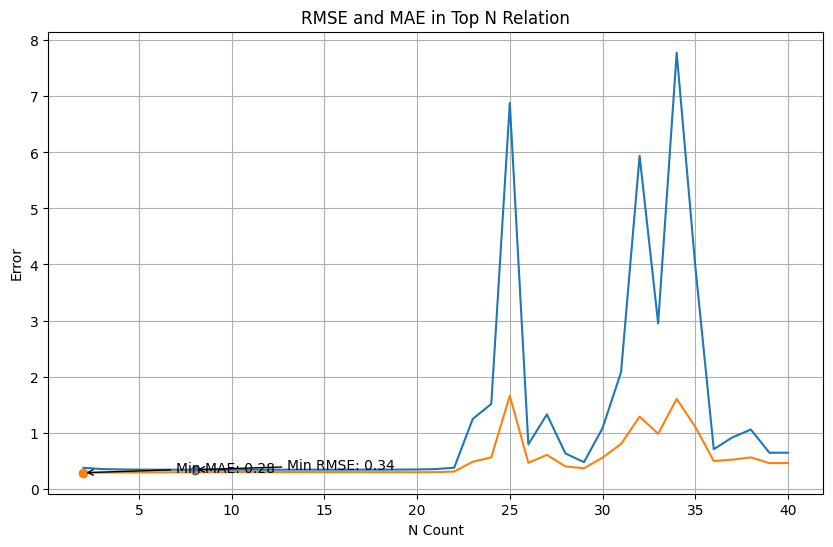

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(sample_arr2, rmse_user_cs, label='RMSE')
plt.plot(sample_arr2, mae_user_cs, label='MAE')
plt.scatter(sample_arr2[min_rmse_index], rmse_user_cs[min_rmse_index], marker='o', label='Min RMSE')
plt.scatter(sample_arr2[min_mae_index], mae_user_cs[min_mae_index], marker='o', label='Min MAE')

plt.annotate(f'Min RMSE: {rmse_user_cs[min_rmse_index]:.2f}',
             xy=(sample_arr2[min_rmse_index], rmse_user_cs[min_rmse_index]),
             xytext=(sample_arr2[min_rmse_index] + 5, rmse_user_cs[min_rmse_index] + 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate(f'Min MAE: {mae_user_cs[min_mae_index]:.2f}',
             xy=(sample_arr2[min_mae_index], mae_user_cs[min_mae_index]),
             xytext=(sample_arr2[min_mae_index] + 5, mae_user_cs[min_mae_index] + 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.xlabel('N Count')
plt.ylabel('Error')
plt.title('RMSE and MAE in Top N Relation')
plt.grid(True)
plt.show()

## ***PREDICT RATING***

In [ ]:
n = 8
df_pred_ub = df_normalized.copy()

# prediksi
for i in range(len(df_pred_ub)):
    # similarity
    # Corrected: Iterate through the columns of df_pred_ub (user names)
    for user_col in df_pred_ub.columns[1:]:
        # memeriksa apakah nilai sama dengan 0
        if (df_pred_ub[user_col][i] == 0):

            numerator = 0
            denominator = 0

            tmp = top_n(n, sim_user_cs, user_col)
            for k in range(len(tmp)):
                if tmp.index[k] != user_col:

                    numerator += ((user_based_df[tmp.index[k]][i]) * tmp.iloc[k])
                    denominator += tmp.iloc[k]

            if denominator != 0 :
                # update nilai prediksi
                df_pred_ub[user_col][i] = average(df_transposed, df_pred_ub['nama film'][i]) + (numerator/denominator)
df_pred_ub

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.310000,0.274399,0.379470,0.310000,0.202405,0.202405,1.000000,0.415244,0.280298,...,0.294109,0.202405,0.310000,0.281010,0.202405,0.263195,0.310000,0.318858,0.289646,0.310000
1,3 Idiots,0.202405,0.198782,0.202405,0.170000,0.170000,0.278023,0.202405,1.000000,0.170000,...,0.148021,0.075955,0.136570,0.117831,0.170000,0.170000,0.223037,0.144897,0.227368,0.170000
2,5 Cowok Jagoan,0.311734,0.202405,0.324292,0.282390,0.285559,1.000000,1.000000,0.202405,0.300000,...,0.300000,0.271402,0.382218,0.364800,0.386883,1.000000,0.336293,0.266588,0.314891,0.300000
3,6 Underground,1.000000,0.601202,0.320000,0.344407,0.997996,1.000000,0.320000,0.202405,0.320000,...,0.344143,0.202405,0.374500,0.281972,0.386033,1.000000,0.353604,0.355410,0.448788,0.320000
4,65,0.202405,0.202405,1.000000,0.202405,0.202405,1.000000,1.000000,0.202405,0.997996,...,1.000000,1.000000,1.000000,0.995992,0.993988,0.202405,0.202405,0.279479,0.202405,0.514397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,You People,0.202405,0.265491,0.294940,0.202405,0.247308,0.264701,0.248028,0.196503,1.000000,...,0.539294,0.229205,0.478562,0.202405,0.320832,0.176625,0.202405,0.290000,0.201492,1.000000
278,Young Adult,0.540000,0.369475,0.553614,0.540000,0.549610,1.000000,0.995992,1.000000,0.542533,...,0.552375,1.000000,0.540000,0.556543,0.953908,0.540000,0.540000,0.545362,0.544412,0.540000
279,Your Place or Mine,0.204409,0.493748,0.480956,1.000000,0.323017,0.354468,0.517102,0.437080,1.000000,...,0.508647,0.530762,0.368002,0.528036,0.473309,0.202405,0.202405,0.484012,0.261781,0.440848
280,Zodiac,1.000000,0.369961,0.202405,0.240000,0.291405,0.204409,0.240000,0.240000,0.240000,...,0.240000,0.404457,0.181600,0.188114,0.183145,0.240000,0.240000,0.202405,0.278912,0.240000


***SAVING DATAFRAME***

In [ ]:
df_pred_ub.to_excel("ResultCF_UB_RoBERTa.xlsx")

In [ ]:
from google.colab import files
files.download("ResultCF_UB_RoBERTa.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ***EVALUATION***

In [ ]:
df_actualub= df_normalized.copy()
df_predub = pd.read_excel("ResultCF_UB_RoBERTa.xlsx")
df_predub = df_predub.drop("Unnamed: 0", axis=1)

df_actual_values = df_actualub.drop(columns='nama film').to_numpy()
df_pred_values = df_predub.drop(columns='nama film').to_numpy()

In [ ]:
errors_user_based = []

# Loop through every value to find where the original rating was not zero
# We only want to calculate errors for items the user actually rated.
for i in range(df_actual_values.shape[0]):
    for j in range(df_actual_values.shape[1]):
        # If the original rating is not 0, calculate the error
        if df_actual_values[i, j] != 0:
            actual = df_actual_values[i, j]
            predicted = df_pred_values[i, j]
            error = abs(actual - predicted)
            errors_user_based.append(error)

# Save the list of errors to a file using NumPy
np.save('errors_user_based_roberta.npy', np.array(errors_user_based))
print(f"Saved {len(errors_user_based)} user-based errors to 'errors_user_based_roberta.npy'")

Saved 3125 user-based errors to 'errors_user_based_roberta.npy'


In [ ]:
errors_array_ub = np.array(errors_user_based)
MAE_ub = np.mean(errors_array_ub)
rmse_cbf_ub = np.sqrt(np.mean(errors_array_ub**2))


print("\nMean Absolute Error (MAE):", MAE_ub)
print("Root Mean Square Error (RMSE):", rmse_cbf_ub)


Mean Absolute Error (MAE): 1.948663452822075e-17
Root Mean Square Error (RMSE): 3.2611088725325876e-17


# ***ITEM-BASED***

In [ ]:
item_based_df = df_transposed

for i in range(len(item_based_df)):
    # Corrected: Iterate over the columns of item_based_df (movie names)
    for movie_col in item_based_df.columns:
        if (item_based_df[movie_col][i] != 0):
            # Corrected: Pass item_based_df to the average function and access column names directly
            item_based_df.loc[item_based_df.index[i], movie_col] -= average(item_based_df, movie_col)
item_based_df

nama film,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
moviemenfes,0.000000,-0.397595,0.000000,-0.070000,-0.677595,-0.260000,0.300000,-0.867595,-0.360000,0.000000,...,-0.837595,-0.697595,-0.917595,-0.767595,-0.010000,-0.577595,0.000000,-0.915591,0.160000,-1.047595
bicaraboxoffice,0.000000,0.000000,-0.827595,-0.368798,-0.657595,0.000000,0.000000,-0.795591,0.000000,-0.807595,...,-0.767595,-0.657595,-0.807595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WatchmenID,0.000000,-0.317595,0.000000,0.000000,0.160000,0.000000,0.000000,0.050000,0.000000,0.000000,...,0.090000,0.180000,0.000000,0.000000,-0.685591,0.000000,0.000000,0.000000,-0.497595,-0.180000
ErikDavis,0.000000,0.000000,0.000000,0.000000,-0.607595,0.000000,0.000000,-0.687595,0.000000,0.000000,...,0.000000,-0.577595,0.000000,0.000000,0.000000,-0.517595,0.000000,-0.030000,0.000000,0.000000
arulfittron,-0.707595,0.000000,0.000000,0.117996,-0.587595,0.000000,-0.377595,0.000000,0.000000,-0.687595,...,0.000000,0.000000,0.000000,0.000000,0.210000,0.000000,0.000000,0.000000,0.000000,-0.907595
GilaFilmID,-0.597595,0.000000,0.140000,0.200000,0.240000,0.000000,0.000000,-0.627595,-0.192004,0.220000,...,-0.657595,-0.547595,0.080000,0.150000,0.000000,0.000000,-0.460000,0.000000,-0.385591,-0.052004
TarizSolis,0.300000,-0.237595,0.290000,0.000000,0.260000,0.000000,0.000000,0.220000,-0.837595,0.320000,...,0.177996,0.000000,0.180000,0.000000,0.000000,0.000000,-0.314008,0.000000,0.000000,0.010000
djaycoholyc,0.000000,0.620000,-0.397595,-0.527595,-0.517595,-0.090000,0.000000,0.270000,0.090000,0.410000,...,0.000000,0.273988,0.260000,0.000000,-0.497595,0.000000,-0.180000,0.000000,0.000000,0.070000
akstanwyck,0.000000,0.000000,0.000000,0.000000,0.307996,0.000000,0.000000,0.310000,0.000000,0.000000,...,0.000000,-0.487595,0.000000,0.000000,0.000000,0.330000,0.000000,0.040000,0.000000,0.000000
slashfilm,0.000000,0.000000,0.000000,0.000000,-0.477595,0.000000,0.000000,-0.437595,0.000000,0.000000,...,0.227996,0.333968,0.000000,0.000000,0.000000,0.380000,0.000000,-0.687595,0.000000,0.000000


## ***Cosine Similarity***

In [ ]:
# mengambil kolom dengan nilai-nilai rating
rating_matrix1 = item_based_df.iloc[:, 1:]
sim_item = cosine_similarity(rating_matrix1.T)

sim_item_cs = pd.DataFrame(sim_item, index=item_based_df.iloc[:, 1:].columns, columns=item_based_df.iloc[:, 1:].columns)
sim_item_cs

nama film,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,AKA,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
nama film,,,,,,,,,,,,,,,,,,,,,
3 Idiots,1.000000,-0.178017,-0.184864,-0.041512,0.013377,-0.064083,0.117896,0.178587,0.062587,0.206744,...,0.097454,0.114064,0.170500,0.111989,-0.017323,0.128262,0.011815,0.143332,0.042875,0.408754
5 Cowok Jagoan,-0.178017,1.000000,0.680365,0.249149,-0.166743,0.000000,0.216206,0.175204,0.287539,0.187434,...,0.175075,0.055736,0.138448,0.008937,0.392439,0.000000,-0.031578,0.014005,-0.037634,-0.009906
6 Underground,-0.184864,0.680365,1.000000,0.083240,0.103236,-0.186401,0.031366,0.321061,0.112245,0.164601,...,0.125893,0.106923,0.145203,-0.092871,0.369206,-0.041224,0.110572,0.001346,0.025098,0.001275
65,-0.041512,0.249149,0.083240,1.000000,0.302752,0.246442,0.306572,0.001859,0.190359,0.490848,...,0.506931,0.353088,0.264356,0.458087,0.151989,0.325272,0.402339,0.258617,-0.149918,0.426041
A Classic Horror Story,0.013377,-0.166743,0.103236,0.302752,1.000000,-0.087024,0.080646,0.052744,0.055403,0.099855,...,0.327326,0.227009,0.311178,0.402839,-0.000552,0.041611,0.313625,0.088030,-0.028574,0.290201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You People,0.128262,0.000000,-0.041224,0.325272,0.041611,-0.044408,0.181769,0.050535,-0.061723,0.143777,...,0.197509,0.157416,0.129126,0.119188,0.050901,1.000000,0.018748,0.130095,-0.054359,0.150035
Young Adult,0.011815,-0.031578,0.110572,0.402339,0.313625,0.319059,0.097834,0.102786,-0.081982,0.309809,...,0.522093,0.351703,0.278721,0.280686,0.206073,0.018748,1.000000,-0.060679,-0.105226,0.225988
Your Place or Mine,0.143332,0.014005,0.001346,0.258617,0.088030,-0.135112,0.625385,0.509773,0.233883,0.310242,...,0.120615,0.336253,0.393314,0.259098,0.211040,0.130095,-0.060679,1.000000,0.000427,0.540415


### **Mencari *Top N***

Menampilkan Top Film berdasarkan nilai *similarity* hasil ***cosine similarity***

In [ ]:
def cek_topN(movie_title):
    print('Film yang mirip dengan "{}" adalah:\n'.format(movie_title))

    # mengurutkan film berdasarkan similarity
    similar_movies = sim_item_cs.sort_values(by=movie_title, ascending=False).index[1:11]

    for rank, similar_movie in enumerate(similar_movies, start=1):
        # nilai similarity
        similarity_score = sim_item_cs.loc[similar_movie, movie_title]
        print("No. {}: Film {} (Score: {:.4f})".format(rank, similar_movie, similarity_score))

In [ ]:
movies = "Merantau"
cek_topN(movies)

Film yang mirip dengan "Merantau" adalah:

No. 1: Film Lincoln (Score: 0.7508)
No. 2: Film My Stupid Boss (Score: 0.7027)
No. 3: Film American Ultra (Score: 0.7011)
No. 4: Film The Doll (Score: 0.6330)
No. 5: Film Paranormal Activity (Score: 0.6297)
No. 6: Film Sinister 2 (Score: 0.6261)
No. 7: Film The Amityville Horror (Score: 0.6003)
No. 8: Film The Roommate (Score: 0.5867)
No. 9: Film The Princess and the Frog (Score: 0.5763)
No. 10: Film The Iron Lady (Score: 0.5691)


## ***FIND OPTIMAL $N$***

In [ ]:
sample_arr1 = np.empty([0])
rmse_item_cs = np.empty([0])
mae_item_cs = np.empty([0])

rating_df = df_transposed.copy()
original_df = df_transposed.copy()

# iterasi sampel n
for n in range(2, 51):
    sample = n

    # iterasi rows and columns
    for i in range(len(rating_df)):
        for j in range(len(sim_item_cs)):
            # Get the movie name from the columns of sim_item_cs
            movie_col_name = sim_item_cs.columns[j]

            if rating_df[movie_col_name][i] != 0:
                numerator = 0
                denominator = 0
                tmp = top_n(sample, sim_item_cs, movie_col_name)

                # iterasi top similar items
                for k in range(len(tmp)):
                    if tmp.index[k] != movie_col_name:
                        numerator += (item_based_df[tmp.index[k]][i] * tmp.iloc[k])
                        denominator += tmp.iloc[k]

                # update rating collaborative filtering
                if denominator != 0:
                    # Pass the transposed dataframe and the movie name to the average function
                    rating_df[movie_col_name][i] = average(df_transposed, movie_col_name) + (numerator / denominator)

    # inisialisasi array (perbandingan)
    original_df.head()
    original_rating = np.array([])
    predicted_rating = np.array([])

    # Corrected: Iterate over the columns of rating_df (movie names)
    for movie_col_name in rating_df.columns:
        # Iterate over the index of rating_df (user names)
        for user_index in range(len(rating_df)):
            if rating_df[movie_col_name][user_index] != 0:
                predicted_rating = np.append(predicted_rating, float(rating_df[movie_col_name][user_index]))
                # Access the original rating from original_df using user index and movie column name
                original_rating = np.append(original_rating, float(original_df[movie_col_name][user_index]))


    # evaluasi
    rmse_item_cs = np.append(rmse_item_cs, round(math.sqrt(mean_squared_error(predicted_rating, original_rating)), 4))
    mae_item_cs = np.append(mae_item_cs, round(np.mean(np.abs(predicted_rating - original_rating)), 4))
    sample_arr1 = np.append(sample_arr1, sample)

In [ ]:
for i in range(len(sample_arr1)):
    print(f"Nilai N: {sample_arr1[i]}, RMSE: {rmse_item_cs[i]}, MAE: {mae_item_cs[i]}")

Nilai N: 2.0, RMSE: 0.363, MAE: 0.274
Nilai N: 3.0, RMSE: 0.3146, MAE: 0.2434
Nilai N: 4.0, RMSE: 0.3015, MAE: 0.2342
Nilai N: 5.0, RMSE: 0.2947, MAE: 0.2296
Nilai N: 6.0, RMSE: 0.2925, MAE: 0.2284
Nilai N: 7.0, RMSE: 0.2907, MAE: 0.2279
Nilai N: 8.0, RMSE: 0.2902, MAE: 0.228
Nilai N: 9.0, RMSE: 0.2904, MAE: 0.2288
Nilai N: 10.0, RMSE: 0.2907, MAE: 0.2299
Nilai N: 11.0, RMSE: 0.2912, MAE: 0.2307
Nilai N: 12.0, RMSE: 0.2916, MAE: 0.231
Nilai N: 13.0, RMSE: 0.2922, MAE: 0.2319
Nilai N: 14.0, RMSE: 0.293, MAE: 0.2331
Nilai N: 15.0, RMSE: 0.2933, MAE: 0.2339
Nilai N: 16.0, RMSE: 0.294, MAE: 0.2348
Nilai N: 17.0, RMSE: 0.2947, MAE: 0.2357
Nilai N: 18.0, RMSE: 0.2954, MAE: 0.2367
Nilai N: 19.0, RMSE: 0.2963, MAE: 0.2377
Nilai N: 20.0, RMSE: 0.2969, MAE: 0.2388
Nilai N: 21.0, RMSE: 0.2976, MAE: 0.2395
Nilai N: 22.0, RMSE: 0.2985, MAE: 0.2406
Nilai N: 23.0, RMSE: 0.2993, MAE: 0.2417
Nilai N: 24.0, RMSE: 0.3001, MAE: 0.2426
Nilai N: 25.0, RMSE: 0.3009, MAE: 0.2435
Nilai N: 26.0, RMSE: 0.3018, M

In [ ]:
min_rmse_index = np.argmin(rmse_item_cs)
min_mae_index = np.argmin(mae_item_cs)

print(f"Pada nilai N = {sample_arr1[min_rmse_index]}, mendapatkan:")
print(f"   - Nilai RMSE minimum = {rmse_item_cs[min_rmse_index]}")
print(f"   - Nilai MAE minimum  = {mae_item_cs[min_mae_index]}")

Pada nilai N = 8.0, mendapatkan:
   - Nilai RMSE minimum = 0.2902
   - Nilai MAE minimum  = 0.2279


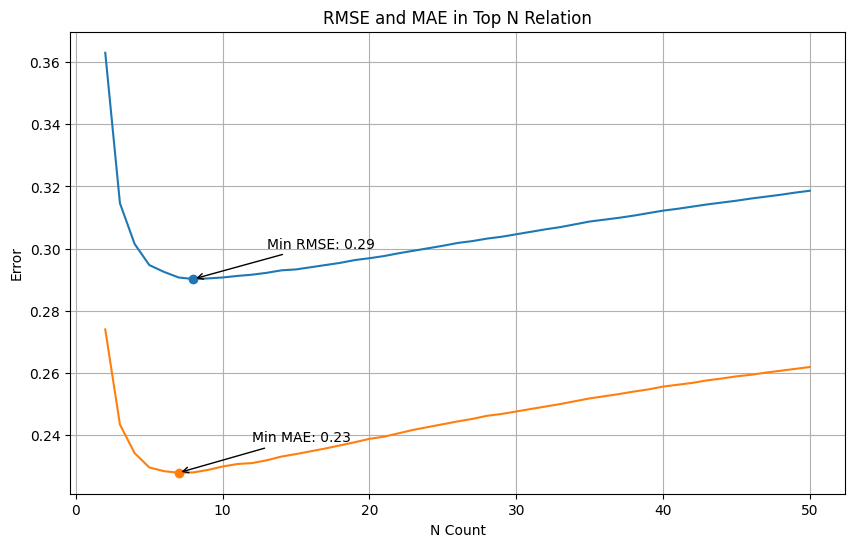

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(sample_arr1, rmse_item_cs, label='RMSE')
plt.plot(sample_arr1, mae_item_cs, label='MAE')
plt.scatter(sample_arr1[min_rmse_index], rmse_item_cs[min_rmse_index], marker='o', label='Min RMSE')
plt.scatter(sample_arr1[min_mae_index], mae_item_cs[min_mae_index], marker='o', label='Min MAE')

plt.annotate(f'Min RMSE: {rmse_item_cs[min_rmse_index]:.2f}',
             xy=(sample_arr1[min_rmse_index], rmse_item_cs[min_rmse_index]),
             xytext=(sample_arr1[min_rmse_index] + 5, rmse_item_cs[min_rmse_index] + 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.annotate(f'Min MAE: {mae_item_cs[min_mae_index]:.2f}',
             xy=(sample_arr1[min_mae_index], mae_item_cs[min_mae_index]),
             xytext=(sample_arr1[min_mae_index] + 5, mae_item_cs[min_mae_index] + 0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.xlabel('N Count')
plt.ylabel('Error')
plt.title('RMSE and MAE in Top N Relation')
plt.grid(True)
plt.show()

## ***PREDICT RATING***

In [ ]:
n = 9
df_pred_ib = df_transposed.copy()

# prediksi
for i in range(len(df_pred_ib)):
    # similarity
    for j in range(len(sim_item_cs)):
        # memeriksa apakah nilai sama dengan 0
        if (df_pred_ib[sim_item_cs.index[j]][i] == 0):

            numerator = 0
            denominator = 0

            tmp = top_n(n, sim_item_cs, sim_item_cs.index[j])
            for k in range(len(tmp)):
                if tmp.index[k] != sim_item_cs.index[j]:

                    numerator += ((item_based_df[tmp.index[k]][i]) * tmp.iloc[k])
                    denominator += tmp.iloc[k]

            if denominator != 0 :
                # update nilai prediksi
                df_pred_ib[sim_item_cs.index[j]][i] = average(df_transposed, sim_item_cs.index[j]) + (numerator/denominator)
df_pred_ib

***SAVING DATAFRAME***

In [ ]:
df_pred_ib.to_excel("ResultCF_IB_RoBERTa.xlsx")

In [ ]:
files.download("ResultCF_IB_RoBERTa.xlsx")

## ***EVALUATION***

In [ ]:
df_actualib = df_transposed.copy()
df_predib = pd.read_excel("ResultCF_IB_RoBERTa.xlsx")
df_predib.rename(columns={'Unnamed: 0': 'nama film'}, inplace=True)

df_actual_values = df_actualib.to_numpy()
df_pred_values = df_predib.drop(columns='nama film').to_numpy()

In [ ]:
errors_item_based = []

# Loop through every value to find where the original rating was not zero
for i in range(df_actual_values.shape[0]):
    for j in range(df_actual_values.shape[1]):
        # If the original rating is not 0, calculate the error
        if df_actual_values[i, j] != 0:
            actual = df_actual_values[i, j]
            predicted = df_pred_values[i, j]
            error = abs(actual - predicted)
            errors_item_based.append(error)

# Save the list of errors to a file using NumPy
np.save('errors_item_based_roberta.npy', np.array(errors_item_based))
print(f"Saved {len(errors_item_based)} item-based errors to 'errors_item_based_roberta.npy'")

In [ ]:
errors_array_ib = np.array(errors_item_based)
MAE_ib = np.mean(errors_array_ib)
rmse_cbf_ib = np.sqrt(np.mean(errors_array_ib**2))

print("\nMean Absolute Error (MAE):", MAE_ib)
print("Root Mean Square Error (RMSE):", rmse_cbf_ib)